In [1]:

import sys
import pandas as pd              # python package for dataframes
import os                        # used to change directory paths
import matplotlib.pyplot as plt  # python package for plotting
import numpy as np
import seaborn as sns #package for plotting
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from IPython.display import display, HTML  # Make tables pretty
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
#import sklearn.cross_validation.Bootstrap as bootstrap
import scipy
import zipfile
import gzip



### import files and merge

In [2]:
path_data = "\\\cskma0294\\F\\Evaluations\\JobPath"
os.chdir(path_data)
df = pd.read_csv("jp_outcomes.csv")



# Convert floats to ints to make reporting easier
numerics = ["float64"]
for col in df.select_dtypes(include=numerics).columns:
    if df[col].isnull().sum() == 0:
        # print(col)
        df[col] = df[col].astype("int")




periods = pd.PeriodIndex(start="2016Q1", end="2017Q4", freq="Q")
period_list = list(periods.strftime("%YQ%q"))
periods_len = len(period_list)

for i, period in enumerate(reversed(period_list)):

    df[period] = df["Group" + str(periods_len - i)].str[:1]
    cat_map = {"T": 1, "C": 0, "0": -1}
    df[period] = df[period].map(cat_map)
    if i > 0:
        later_periods = period_list[-i:]
        df.loc[df[period] == 1, later_periods] = -2

df.shape

(110135, 135)

In [3]:
        
path_data = "\\\cskma0294\\F\\Evaluations\\JobPath\\Quarterly_status"
os.chdir(path_data)

df_shares = pd.read_csv("shares_2017.zip")
df=pd.merge(df, df_shares, on='ppsn', how='left')

df.head()

,Unnamed: 0,id,ppsn,cluster,age,duration_days_0,sex,LM_code_rank_P1,occupation_rank_P1,ada_code_rank_P1,...,Empl_13_15share,Empl_13_15sum,Ed_or_Training_13_15share,Ed_or_Training_13_15sum,LM_WSW_13_15share,LM_WSW_13_15sum,LR_13_15share,LR_13_15sum,WSW_13_15share,WSW_13_15sum
0,0,0,0099665M,2,54,6316,1,6,2.0,5,...,0.0,0,0.0,0,0.967,88,0.549,50,0.0,0
1,1,1,0206477C,2,59,3964,2,6,5.0,5,...,0.0,0,0.0,0,1.000,91,0.560,51,0.0,0
2,2,2,0202920T,2,59,1285,2,6,7.0,4,...,0.0,0,0.0,0,0.989,90,0.560,51,0.0,0
3,3,3,0205276K,5,55,1415,2,6,2.0,6,...,0.0,0,0.0,0,1.000,91,0.000,0,0.0,0
4,4,4,0202425J,2,59,2445,2,6,7.0,5,...,0.0,0,0.0,0,1.000,91,0.549,50,0.0,0


In [ ]:
df.drop('Unnamed: 0', axis=1)



In [ ]:
df.set_index('id', drop=True)

In [6]:
df.drop('Unnamed: 0', axis=1,inplace = True)

In [ ]:
df['earn_tot_mean_1315'].groupby['y']

In [77]:
#group_ycl=df['earn_tot_mean_1315'].groupby(df['y', 'cluster']).mean()

un=df.groupby(['y', 'cluster'])['earn_tot_mean_1315'].describe()


In [ ]:
un.plot()

ValueError: Must pass DataFrame with boolean values only

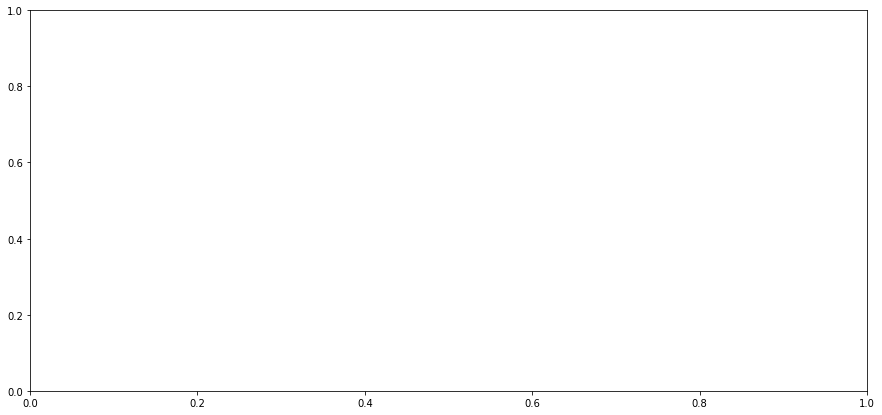

In [87]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['y', 'cluster']).mean()['earn_tot_mean_1315'].unstack().plot(df, kind='barh', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=None, use_index=True, title=None, legend=True)
#data.groupby(['date','type']).count()['amount'].unstack().plot(ax=ax)


In [68]:
display(group_ycl)

y
0    1385.885250
1     744.920982
Name: earn_tot_mean_1315, dtype: float64

### select features/variables

In [8]:
select=df[df['2016Q1']!=-1]
select['y']=df['2016Q1']
#y=['y_1']

select['y'].value_counts()
select=select.set_index('id',drop=True)
select=select.sort_index()
select=select.reset_index()

C:\Users\hughcronin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
select.index.names=['2016Q1_index']

In [10]:
select.tail()

,id,ppsn,cluster,age,duration_days_0,sex,LM_code_rank_P1,occupation_rank_P1,ada_code_rank_P1,family_flag_rank_P1,...,Empl_13_15sum,Ed_or_Training_13_15share,Ed_or_Training_13_15sum,LM_WSW_13_15share,LM_WSW_13_15sum,LR_13_15share,LR_13_15sum,WSW_13_15share,WSW_13_15sum,y
2016Q1_index,,,,,,,,,,,,,,,,,,,,,
94343,110130,9638538J,2,58,804,1,6,10.0,1,1,...,0,0.0,0,1.000,91,0.000,0,0.0,0,0
94344,110131,9641220S,1,54,590,1,6,6.0,1,1,...,0,0.0,0,0.901,82,0.560,51,0.0,0,1
94345,110132,9641428T,2,52,2733,1,6,6.0,2,1,...,0,0.0,0,1.000,91,0.560,51,0.0,0,0
94346,110133,9641733B,3,52,396,1,6,6.0,1,1,...,0,0.0,0,0.615,56,0.000,0,0.0,0,0
94347,110134,9641815D,2,58,1458,1,6,7.0,1,1,...,0,0.0,0,1.000,91,0.352,32,0.0,0,0


In [11]:
#X = data_final.loc[:, data_final.columns != 'y']
y = select.loc[:, select.columns == 'y']

#features =['sw_pay_mean_1315', 'earn_tot_mean_1315', 'age', 'occupation_rank_P1','Duration Bands', 'cluster', 
#  'family_flag_rank_P1', 'WSW_13_15share', 'Ed_or_Training_13_15share', 'LM_WSW_13_15share']
features =['sw_pay_2013',
            'sw_pay_2014',
            'sw_pay_2015',
            'earn_tot_2012',
            'earn_tot_2013',
            'earn_tot_2014',
            'earn_tot_2015',
           'age', 
           #'occupation_rank_P1',
          'Duration Bands',
           #'LM_code_rank_P1',
          #'LM_WSW_13_15share',
           'family_flag_rank_P1',
           #'LM_WSW_13_15share',
           #'hist_lr_0',
           'total_duration_days',
           # 'Duration Bands',
           #'Empl_13_15share',
            'Empl_13_15sum',
 'Ed_or_Training_13_15share',
 #'Ed_or_Training_13_15sum',
 'LM_WSW_13_15share',
 #'LM_WSW_13_15sum',
 #'LR_13_15share',
 'LR_13_15sum',
 'WSW_13_15share',
 #'WSW_13_15sum',
           #'Ed_or_Training_13_15share',
          ]

X = select[features] # to enforce column order

In [12]:
X.shape

(94348, 16)

#### check for missing values

In [120]:
df.columns[df.isna().any()].tolist()


['occupation_rank_P1',
 'marital_status_rank_P1',
 'occupation_rank_P2',
 'marital_status_rank_P2',
 'occupation_rank_P3',
 'marital_status_rank_P3',
 'occupation_rank_P4',
 'marital_status_rank_P4',
 'occupation_rank_P5',
 'marital_status_rank_P5',
 'occupation_rank_P6',
 'marital_status_rank_P6',
 'occupation_rank_P7',
 'occupation_rank_P8',
 'marital_status_rank_P7',
 'marital_status_rank_P8',
 'Cancellationsubcategory']

#### logistic regression based on TPot range of options

In [13]:
df.sort_values(['id'])

,id,ppsn,cluster,age,duration_days_0,sex,LM_code_rank_P1,occupation_rank_P1,ada_code_rank_P1,family_flag_rank_P1,...,Empl_13_15share,Empl_13_15sum,Ed_or_Training_13_15share,Ed_or_Training_13_15sum,LM_WSW_13_15share,LM_WSW_13_15sum,LR_13_15share,LR_13_15sum,WSW_13_15share,WSW_13_15sum
0,0,0099665M,2,54,6316,1,6,2.0,5,3,...,0.000,0,0.0,0,0.967,88,0.549,50,0.000,0
1,1,0206477C,2,59,3964,2,6,5.0,5,3,...,0.000,0,0.0,0,1.000,91,0.560,51,0.000,0
2,2,0202920T,2,59,1285,2,6,7.0,4,1,...,0.000,0,0.0,0,0.989,90,0.560,51,0.000,0
3,3,0205276K,5,55,1415,2,6,2.0,6,3,...,0.000,0,0.0,0,1.000,91,0.000,0,0.000,0
4,4,0202425J,2,59,2445,2,6,7.0,5,3,...,0.000,0,0.0,0,1.000,91,0.549,50,0.000,0
5,5,0509918T,2,39,1129,2,6,7.0,6,3,...,0.000,0,0.0,0,0.978,89,0.560,51,0.000,0
6,6,0511303R,2,19,466,1,6,1.0,1,1,...,0.000,0,0.0,0,0.714,65,0.165,15,0.000,0
7,7,0526622S,1,57,445,2,6,4.0,1,1,...,0.000,0,0.0,0,0.451,41,0.473,43,0.000,0
8,8,0527442V,2,59,557,1,6,10.0,6,3,...,0.121,11,0.0,0,0.769,70,0.198,18,0.000,0
9,9,0503804U,2,31,914,2,6,2.0,6,4,...,0.000,0,0.0,0,1.000,91,0.154,14,0.000,0


In [15]:
logreg = LogisticRegression(C=25.0, dual=False, penalty="l1")
logreg.fit(X, y)

C:\Users\hughcronin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hughcronin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=25.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [60]:
coefficients = pd.concat([pd.dataframe(X.columns),pd.dataframe(np.transpose(logistic.coef_))], axis = 1)
print(coefficients)
logreg.score(X, y)
y.mean()
#what share of people are treated? ie if you had to predict, going for no would give better results


AttributeError: module 'pandas' has no attribute 'dataframe'

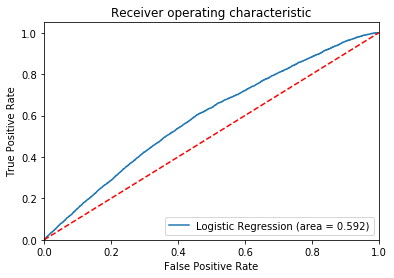

In [16]:



logit_roc_auc = roc_auc_score(y, logreg.predict(X))
fpr, tpr, thresholds = roc_curve(y, logreg.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = 0.592)' )
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [17]:
a=logreg.predict_proba(X)
y_pred_prob = a[:,1]
roc_auc_score(y, y_pred_prob)
print(y_pred_prob)
type(y_pred_prob)
y_pred_prob.shape
pp= pd.Series(y_pred_prob)

[0.08739554 0.08881154 0.08954674 ... 0.08197731 0.03432992 0.07458577]


In [18]:
pp.shape

(94348,)

In [19]:
pp.tail()

94343    0.060958
94344    0.081518
94345    0.081977
94346    0.034330
94347    0.074586
dtype: float64

In [20]:
select['Propensity']=pp

In [21]:
df=select

In [22]:
df.tail()

,id,ppsn,cluster,age,duration_days_0,sex,LM_code_rank_P1,occupation_rank_P1,ada_code_rank_P1,family_flag_rank_P1,...,Ed_or_Training_13_15share,Ed_or_Training_13_15sum,LM_WSW_13_15share,LM_WSW_13_15sum,LR_13_15share,LR_13_15sum,WSW_13_15share,WSW_13_15sum,y,Propensity
2016Q1_index,,,,,,,,,,,,,,,,,,,,,
94343,110130,9638538J,2,58,804,1,6,10.0,1,1,...,0.0,0,1.000,91,0.000,0,0.0,0,0,0.060958
94344,110131,9641220S,1,54,590,1,6,6.0,1,1,...,0.0,0,0.901,82,0.560,51,0.0,0,1,0.081518
94345,110132,9641428T,2,52,2733,1,6,6.0,2,1,...,0.0,0,1.000,91,0.560,51,0.0,0,0,0.081977
94346,110133,9641733B,3,52,396,1,6,6.0,1,1,...,0.0,0,0.615,56,0.000,0,0.0,0,0,0.034330
94347,110134,9641815D,2,58,1458,1,6,7.0,1,1,...,0.0,0,1.000,91,0.352,32,0.0,0,0,0.074586


##### check of any null values in propensity

In [23]:
type(df['Propensity'] )
df['Propensity'].isnull().values.any()

#df['Propensity'].isnull().sum().sum() 

False

#### retain inital, unweighted, dataset variables to compare

In [24]:
initial=df[['Propensity','y','age', 'sw_pay_mean_1315', 'duration_days_0', 'earn_tot_mean_1315']]

In [25]:
initial.shape

(94348, 6)

In [26]:
initial.columns[initial.isna().any()].tolist()


[]

#### calculate odds ratios

In [27]:
df['o_ratio']= df['y']
df['o_ratio']= df['y'] + (1-df['y'])*df['Propensity']/(1-df['Propensity'])


In [28]:
average_odds=dict(df['o_ratio'].groupby(df['y']).mean())

df['report_o_ratio']=df['o_ratio']
df.loc[df['y']==0, 'report_o_ratio']=df['report_o_ratio']/average_odds[0]




#### how does the sume of the weighted control units compare to the sum of the treated units?

In [ ]:
for title, group in df.groupby('y'):
    group.plot(x='age', y='MeanToDate', title=title)

In [29]:
average_odds_sum=dict(df['o_ratio'].groupby(df['y']).sum())
print(average_odds_sum)


{0: 5581.792949965646, 1: 5581.0}


In [45]:
d=df.pivot_table(index='age', columns='y', values='o_ratio', aggfunc=np.sum)
d.reset_index()
#groupby(['y', 'age'])['o_ratio'].sum()

y,age,0,1
0,18,4.536276,4.0
1,19,51.796672,43.0
2,20,69.966712,66.0
3,21,72.805127,73.0
4,22,74.026605,65.0
5,23,77.384207,74.0
6,24,105.309284,93.0
7,25,125.738453,120.0
8,26,135.433285,139.0
9,27,136.918841,136.0


(array([ 6146.,  8739., 10813., 10930., 10413.,  9944.,  9727.,  9341.,
         8748.,  9547.]),
 array([18. , 22.1, 26.2, 30.3, 34.4, 38.5, 42.6, 46.7, 50.8, 54.9, 59. ]),
 <a list of 10 Patch objects>)

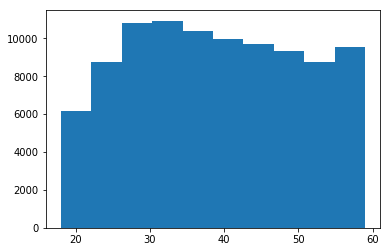

In [58]:
#d.plot.hist(bins=10, x='age', y=np.sum, alpha=0.3)

# sns.distplot(d, bins=10, hist=True, kde=False, 
#              rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, 
#              fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
from matplotlib.pyplot import hist
hist(df['age'], bins=10)

C:\Users\hughcronin\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


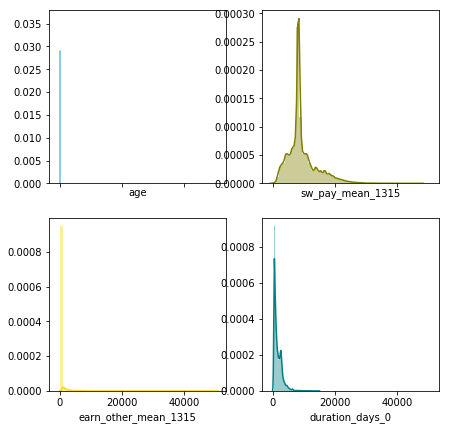

In [55]:
#
 
# plot
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot( df["age"] , color="skyblue", ax=axes[0, 0])
sns.distplot( df["sw_pay_mean_1315"] , color="olive", ax=axes[0, 1])
sns.distplot( df["earn_other_mean_1315"] , color="gold", ax=axes[1, 0])
sns.distplot( df["duration_days_0"] , color="teal", ax=axes[1, 1])


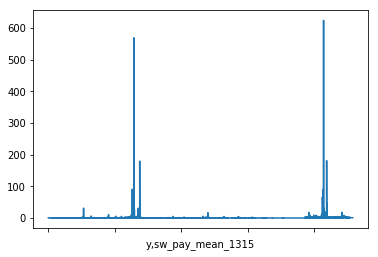

In [36]:
df.groupby(['y', 'sw_pay_mean_1315'])['o_ratio'].sum().plot()

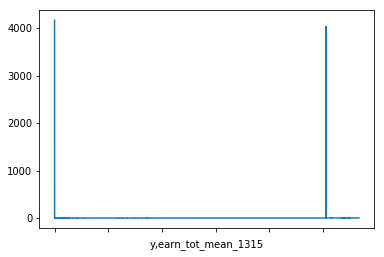

In [37]:
df.groupby(['y', 'earn_tot_mean_1315'])['o_ratio'].sum().plot()

#### age, social welfare payments, earnings and duration - compare the weighted and unweighted means

In [66]:
list(df)

['id',
 'ppsn',
 'cluster',
 'age',
 'duration_days_0',
 'sex',
 'LM_code_rank_P1',
 'occupation_rank_P1',
 'ada_code_rank_P1',
 'family_flag_rank_P1',
 'marital_status_rank_P1',
 'LM_code_rank_P2',
 'occupation_rank_P2',
 'ada_code_rank_P2',
 'family_flag_rank_P2',
 'marital_status_rank_P2',
 'LM_code_rank_P3',
 'occupation_rank_P3',
 'ada_code_rank_P3',
 'family_flag_rank_P3',
 'marital_status_rank_P3',
 'LM_code_rank_P4',
 'occupation_rank_P4',
 'ada_code_rank_P4',
 'family_flag_rank_P4',
 'marital_status_rank_P4',
 'LM_code_rank_P5',
 'occupation_rank_P5',
 'ada_code_rank_P5',
 'family_flag_rank_P5',
 'marital_status_rank_P5',
 'LM_code_rank_P6',
 'occupation_rank_P6',
 'ada_code_rank_P6',
 'family_flag_rank_P6',
 'marital_status_rank_P6',
 'LM_code_rank_P7',
 'occupation_rank_P7',
 'ada_code_rank_P7',
 'family_flag_rank_P7',
 'LM_code_rank_P8',
 'occupation_rank_P8',
 'ada_code_rank_P8',
 'family_flag_rank_P8',
 'marital_status_rank_P7',
 'marital_status_rank_P8',
 'jp_started_P1'

In [22]:
var_to_weight =['total_duration_days','sw_pay_mean_1315','earn_tot_mean_1215','duration_days_0',
       'LR_2017share','Ed_or_Training_2017share', 'earn_tot_2012', 'earn_tot_2013', 
       'earn_tot_2014', 'earn_tot_2015', 'earn_tot_2016', 'earn_tot_2017', 'sw_pay_2017', 'sw_pay_2018', 'age']
#'Duration Bands',


for col in var_to_weight:
    df["w_" + col] = df[col] *df['report_o_ratio']

# for v in var_to_weight:
#     df['weighted_'+(v)]=df['v']*df['report_o_ratio']
 

In [ ]:
p1=sns.kdeplot(df['sepal_width'], shade=True, color="r")
p1=sns.kdeplot(df['sepal_length'], shade=True, color="b")
#sns.plt.show()

In [ ]:
df.groupby(['y', 'age'])[o_ratio].sum

In [50]:
df['r_w_age']=df['w_age']*average_odds[0]
df['tr_w_age']=df['w_age']*average_odds[1]

TypeError: unsupported operand type(s) for *: 'float' and 'dict'

[0 1]
(88767, 173)
(5581, 173)


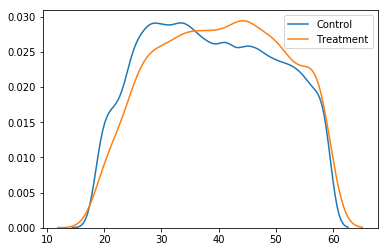

In [42]:
#total_duration_days','sw_pay_mean_1315','earn_tot_mean_1215','duration_days_0',
unique_vals = df['y'].unique()
print(unique_vals)
df['y'].value_counts()

# # Sort the dataframe by target
# # Use a list comprehension to create list of sliced dataframes
targets = [df.loc[df['y'] == val] for val in unique_vals]
for index, group in enumerate(['Control', 'Treatment']):
    subset=df.loc[df['y'] ==index]
    print(subset.shape)
    sns.kdeplot(subset['age'], kernel='gau', label = group )
plt.legend()
plt.show()

[0 1]
(88767, 173)
(5581, 173)


C:\Users\hughcronin\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


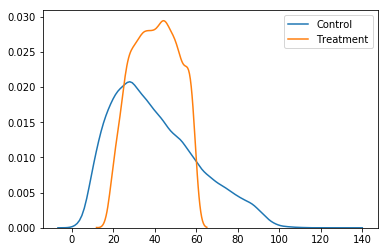

In [47]:
#total_duration_days','sw_pay_mean_1315','earn_tot_mean_1215','duration_days_0',
unique_vals = df['y'].unique()
print(unique_vals)
df['y'].value_counts()

# # Sort the dataframe by target
# # Use a list comprehension to create list of sliced dataframes
targets = [df.loc[df['y'] == val] for val in unique_vals]
for index, group in enumerate(['Control', 'Treatment']):
    subset=df.loc[df['y'] ==index]
    print(subset.shape)
    sns.kdeplot(subset['w_age'], kernel='gau', label = group )
plt.legend()
plt.show()

[0 1]
(88767, 173)
(5581, 173)


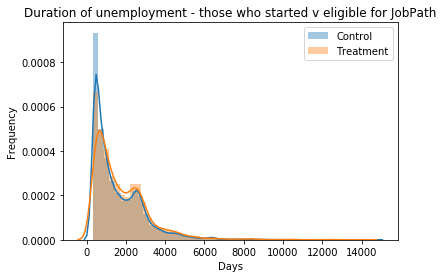

In [41]:
#total_duration_days','sw_pay_mean_1315','earn_tot_mean_1215','duration_days_0',
unique_vals = df['y'].unique()
print(unique_vals)
df['y'].value_counts()

# # Sort the dataframe by target
# # Use a list comprehension to create list of sliced dataframes
targets = [df.loc[df['y'] == val] for val in unique_vals]
for index, group in enumerate(['Control', 'Treatment']):
    subset=df.loc[df['y'] ==index]
    print(subset.shape)
    sns.distplot(subset['duration_days_0'], label = group )
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.title("Duration of unemployment - those who started v eligible for JobPath")
plt.legend()
plt.savefig('Dur_TC')
plt.show()

#### Outcomes

In [28]:
#df.head()


print(df['w_LR_2017share'].groupby(df['y']).mean())
#print(df['w_earn_tot_2017'].groupby(df['y']).mean())


y
0    0.657972
1    0.658182
Name: w_LR_2017share, dtype: float64


In [29]:
group_cl=df.groupby(['y', 'cluster'])

In [38]:
LR=group_cl['w_LR_2017share'].mean()
display(LR.T)

y  cluster
0  0          0.478607
   1          0.482924
   2          0.764246
   3          0.512661
   4          0.522269
   5          0.428076
   6          0.586121
1  0          0.528881
   1          0.559219
   2          0.706248
   3          0.598240
   4          0.552188
   5          0.542156
   6          0.637680
Name: w_LR_2017share, dtype: float64

In [60]:
group_cl['w_earn_tot_2017'].mean().round(0)

y  cluster
0  0          4559.0
   1          4534.0
   2          2561.0
   3          3972.0
   4          3897.0
   5          3674.0
   6          3715.0
1  0          7048.0
   1          7131.0
   2          3256.0
   3          6422.0
   4          7804.0
   5          5291.0
   6          4969.0
Name: w_earn_tot_2017, dtype: float64

In [62]:
group_cl['w_earn_tot_2017'].median().round(0)

y  cluster
0  0          1495.0
   1          1047.0
   2             0.0
   3           350.0
   4           760.0
   5             0.0
   6             0.0
1  0          3276.0
   1          1694.0
   2             0.0
   3          1020.0
   4          2123.0
   5             0.0
   6             2.0
Name: w_earn_tot_2017, dtype: float64

In [68]:
group_cl['w_sw_pay_2017'].mean().round(2)

y  cluster
0  0           8243.44
   1           8512.93
   2          10601.59
   3           8619.34
   4           8236.80
   5           8846.96
   6           8439.23
1  0           7909.71
   1           8578.95
   2          10974.64
   3           7948.88
   4           7955.99
   5           9263.08
   6           9356.55
Name: sw_pay_2017, dtype: float64

In [69]:
group_cl['w_sw_pay_2017'].mean().round(2)

y  cluster
0  0          3718.04
   1          3851.00
   2          4986.70
   3          3921.74
   4          3860.55
   5          3925.39
   6          4018.33
1  0          3471.90
   1          3673.93
   2          4832.69
   3          3287.83
   4          3317.03
   5          3866.36
   6          3934.23
Name: sw_pay_2018, dtype: float64

In [69]:
group_cl['w_sw_pay_2018'].mean().round(2)

y  cluster
0  0          3718.04
   1          3851.00
   2          4986.70
   3          3921.74
   4          3860.55
   5          3925.39
   6          4018.33
1  0          3471.90
   1          3673.93
   2          4832.69
   3          3287.83
   4          3317.03
   5          3866.36
   6          3934.23
Name: sw_pay_2018, dtype: float64

In [80]:
group_cl['w_sw_pay_2018'].median().round(2)

y  cluster
0  0          3513.0
   1          3812.0
   2          5088.0
   3          4242.0
   4          3890.0
   5          3698.0
   6          4412.0
1  0          2438.5
   1          3921.5
   2          5088.0
   3          3362.5
   4          2740.0
   5          2806.5
   6          4184.0
Name: sw_pay_2018, dtype: float64

In [80]:
df.groupby(['y', 'sex'])['w_earn_tot_2017'].mean()

#df['sw_pay_2018'].median().round(2)

y  cluster
0  0          3513.0
   1          3812.0
   2          5088.0
   3          4242.0
   4          3890.0
   5          3698.0
   6          4412.0
1  0          2438.5
   1          3921.5
   2          5088.0
   3          3362.5
   4          2740.0
   5          2806.5
   6          4184.0
Name: sw_pay_2018, dtype: float64

#### subsets - 1. non-zero earnings in 2017

In [57]:

#non-z=df.loc[df['w_earn_tot_2017']>0]


non_Z=df[df['w_earn_tot_2017']>0]
non_Z.shape
Z=non_Z.groupby(['y','cluster'])


In [42]:
#print(non_Z['w_LR_2017share'].groupby(non_Z['y', 'cluster']).mean())


In [42]:
group_nonZ=non_Z.groupby(['y', 'cluster'])

In [43]:
Ear=group_nonZ['w_LR_2017share'].mean()
display(Ear)

y  cluster
0  0          0.339990
   1          0.336768
   2          0.453322
   3          0.371323
   4          0.364379
   5          0.310653
   6          0.387795
1  0          0.402053
   1          0.372902
   2          0.476584
   3          0.432792
   4          0.364915
   5          0.406846
   6          0.490552
Name: w_LR_2017share, dtype: float64

In [63]:
Ear=group_nonZ['w_earn_tot_2017'].mean().round(0)
display(Ear)

y  cluster
0  0           7918.0
   1           8378.0
   2           8878.0
   3           7670.0
   4           7265.0
   5           8701.0
   6           7786.0
1  0          11090.0
   1          12846.0
   2          10197.0
   3          11954.0
   4          13691.0
   5          13024.0
   6           9939.0
Name: w_earn_tot_2017, dtype: float64

In [70]:
Ear=group_nonZ['w_earn_tot_2017'].median().round(0)
display(Ear)

y  cluster
0  0           6364.0
   1           6980.0
   2           7410.0
   3           6059.0
   4           5748.0
   5           6718.0
   6           6426.0
1  0           8724.0
   1          10828.0
   2           6568.0
   3           8431.0
   4          10800.0
   5          11870.0
   6           6103.0
Name: w_earn_tot_2017, dtype: float64

In [72]:
Ear=group_nonZ['w_earn_tot_2017'].median().round(0)
display(Ear)

y  cluster
0  0           6364.0
   1           6980.0
   2           7410.0
   3           6059.0
   4           5748.0
   5           6718.0
   6           6426.0
1  0           8724.0
   1          10828.0
   2           6568.0
   3           8431.0
   4          10800.0
   5          11870.0
   6           6103.0
Name: w_earn_tot_2017, dtype: float64

In [81]:
Ear=group_nonZ['sw_pay_2018'].median().round(0)
display(Ear)

y  cluster
0  0          1680.0
   1          1680.0
   2          1980.0
   3          1544.0
   4          2016.0
   5          1400.0
   6          1815.0
1  0          1138.0
   1          1088.0
   2           462.0
   3             0.0
   4           112.0
   5           240.0
   6          1503.0
Name: sw_pay_2018, dtype: float64

In [65]:

print(non_Z['w_LR_2017share'].groupby(non_Z['y']).mean())
print(non_Z['w_earn_tot_2017'].groupby(non_Z['y']).median().round(0))

y
0    0.395925
1    0.439305
Name: w_LR_2017share, dtype: float64
y
0    6958.0
1    7683.0
Name: w_earn_tot_2017, dtype: float64


In [ ]:
transformed = (ts.groupby(lambda x: x.year)
   ....:                  .transform(lambda x: (x - x.mean()) / x.std()))

In [ ]:
transformed = (df.groupby('y').transform(lambda x: (x - x.mean()) / x.std()))

In [ ]:
##### Find those who earned something in each group, T and C; done

#### multiply the count in C group in employment (>0) by readjusted odds ratio, 
##### sum of those weights divided by sum of all C group weights - done

##### present the uplift in earnings - done

##### knock out the non-earners, compare average amount - done

#### subset 2. remove future treatment

In [97]:

pure=df[df['2016Q1']!=-2] & df[df['2016Q2']!=-2] & df[df['2016Q3']!=-2]
pure.shape

NotImplementedError: couldn't find matching opcode for 'and_bld'

In [91]:
pure['2017Q4'].values


array([-2,  0, -2, ..., -2, -1, -1], dtype=int64)

In [88]:
  



'total_duration_days',
           # 'Duration Bands',
           'sw_pay_mean_1315','earn_tot_mean_1215',duration_days_0''LR_2017share',
'Ed_or_Training_2017share',

'earn_tot_2012',
 'earn_tot_2013',
 'earn_tot_2014',
 'earn_tot_2015',
 'earn_tot_2016',
 'earn_tot_2017',



IndentationError: unexpected indent (<ipython-input-88-1d594d96a232>, line 7)

#### Balance diagnostics

#### having generated weighted columns with '_weighted' appended to the var name, generate smd as the mean/std for the original variables and the weighted variables

In [116]:
#df.groupby("y").std(ddof=0) 


#print(df.groupby(['y'])['age'].apply(np.std))
#print(df.groupby(['y'])['age'].apply(np.mean))
m=df.groupby(['y'])['age'].mean()
m2=df.groupby(['y'])['w_age'].mean()
s=df.groupby(['y'])['age'].std()
s2=df.groupby(['y'])['w_age'].std()
#smd=(m-m2)/((s+s2)/2)
#display(smd)
print(m, s, m2, s2)

y
0    38.885509
1    40.348145
Name: age, dtype: float64 y
0    11.081398
1    10.790233
Name: age, dtype: float64 y
0    40.332934
1    40.348145
Name: w_age, dtype: float64 y
0    20.578973
1    10.790233
Name: w_age, dtype: float64


In [24]:

df['weighted_age']=df['age']*df['report_o_ratio']
print(df['age'].groupby(df['y']).mean())
print(df['weighted_age'].groupby(df['y']).mean())


df['weighted_age']=df['age']*df['report_o_ratio']
print(df['age'].groupby(df['y']).mean())
print(df['weighted_age'].groupby(df['y']).mean())

df['weighted_earn']=df['earn_tot_mean_1215']*df['report_o_ratio']
print(df['earn_tot_mean_1215'].groupby(df['y']).mean())
print(df['weighted_earn'].groupby(df['y']).mean())

df['weighted_sw_pay']=df['sw_pay_mean_1315']*df['report_o_ratio']
print(df['sw_pay_mean_1315'].groupby(df['y']).mean())
print(df['weighted_sw_pay'].groupby(df['y']).mean())

df['weighted_dur_0']=df['duration_days_0']*df['report_o_ratio']
print(df['duration_days_0'].groupby(df['y']).mean())
print(df['weighted_dur_0'].groupby(df['y']).mean())


y
0    38.885509
1    40.348145
Name: age, dtype: float64
y
0    40.332934
1    40.348145
Name: weighted_age, dtype: float64
y
0    38.885509
1    40.348145
Name: age, dtype: float64
y
0    40.332934
1    40.348145
Name: weighted_age, dtype: float64
y
0    1711.561661
1    1040.233650
Name: earn_tot_mean_1215, dtype: float64
y
0    1037.462086
1    1040.233650
Name: weighted_earn, dtype: float64
y
0    9371.743159
1    9792.790898
Name: sw_pay_mean_1315, dtype: float64
y
0    9789.120784
1    9792.790898
Name: weighted_sw_pay, dtype: float64
y
0    1557.782926
1    1757.338291
Name: duration_days_0, dtype: float64
y
0    1764.787441
1    1757.338291
Name: weighted_dur_0, dtype: float64


In [ ]:
# is it possible to loop through the columns in the dataframe and calculate a value for smd
# this needs to subtract mean values where y =0 from those where y=1; then add std dev values for both y groups and divide by two
col_list=['total_duration_days','sw_pay_mean_1315','earn_tot_mean_1215','duration_days_0','LR_2017share','Ed_or_Training_2017share',
'earn_tot_2012', 'earn_tot_2013', 'earn_tot_2014', 'earn_tot_2015', 'earn_tot_2016', 'earn_tot_2017', 'LR_2017share',
          'Ed_or_Training_2017share']
for col in col_list:
    smd=df.groupby(['y']).apply(np.mean)/df.groupby(['y']).apply(np.std)
            # print(col)
    df[col] = df[col].astype("float")


existing differences - earnings, age, social welfare payments
then distribuion of weighted same variables
Likely to be working and, if so, how much you earn
histogram centiles - counting people in each centile 
Median out